In [203]:
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("data/ks-projects-201801.csv")
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [204]:
cleaned_data = data[((data.state == 'failed') | (data.state == 'successful')) & (data.main_category == 'Technology')]

# Remove unnecessary predictors
removable_columns = ['ID', 'currency', 'goal', 'usd pledged', 'pledged', 'name', 'main_category']
cleaned_data = cleaned_data.drop(removable_columns, axis=1)

display(cleaned_data.describe())
display(cleaned_data.head())

,backers,usd_pledged_real,usd_goal_real
count,27050.00000,2.705000e+04,2.705000e+04
mean,186.14695,2.397673e+04,9.807654e+04
std,1228.11862,1.359790e+05,1.591295e+06
min,0.00000,0.000000e+00,7.500000e-01
25%,1.00000,1.100000e+01,5.009007e+03
50%,7.00000,3.600000e+02,1.800000e+04
75%,54.00000,5.515750e+03,5.000000e+04
max,105857.00000,6.225355e+06,1.101698e+08


,category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
65,Hardware,2015-07-03,2015-06-03 05:52:43,failed,0,CA,0.00,39739.31
67,Software,2017-07-02,2017-06-02 12:20:21,failed,0,GB,0.00,2579.35
71,Web,2016-08-23,2016-07-24 13:18:36,failed,3,US,141.00,100000.00
98,Gadgets,2015-03-07,2015-02-05 16:57:21,failed,3,CA,2.36,19632.48
112,Gadgets,2017-06-14,2017-05-10 16:00:18,failed,6,US,74.00,500.00


In [205]:
# add in variable for length of campaign

launched = [row.split(' ')[0] for row in cleaned_data['launched']]
deadline = [row for row in cleaned_data['deadline']]
date_list = list(zip(launched, deadline))

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

cleaned_data['campaign_length'] = [days_between(item[0], item[1]) for item in date_list]

# remove unnecessary predictors
cleaned_data = cleaned_data.drop(['launched', 'deadline'], axis=1)
display(cleaned_data.describe())

,backers,usd_pledged_real,usd_goal_real,campaign_length
count,27050.00000,2.705000e+04,2.705000e+04,27050.000000
mean,186.14695,2.397673e+04,9.807654e+04,35.264288
std,1228.11862,1.359790e+05,1.591295e+06,11.771582
min,0.00000,0.000000e+00,7.500000e-01,1.000000
25%,1.00000,1.100000e+01,5.009007e+03,30.000000
50%,7.00000,3.600000e+02,1.800000e+04,30.000000
75%,54.00000,5.515750e+03,5.000000e+04,40.000000
max,105857.00000,6.225355e+06,1.101698e+08,92.000000


In [206]:
# Per mentor suggestion, drop all observations where there are no backers.

cleaned_data = cleaned_data[cleaned_data.backers != 0]

def defineDollarsPerBacker(usd, backers):
    if backers > 0:
        return usd/backers
    else:
        return 0

cleaned_data['dollars_per_backer'] = [defineDollarsPerBacker(row[0], row[1]) for row in zip(cleaned_data['usd_pledged_real'], cleaned_data['backers'])]
cleaned_data.head()
cleaned_data.describe()

,backers,usd_pledged_real,usd_goal_real,campaign_length,dollars_per_backer
count,23021.000000,2.302100e+04,2.302100e+04,23021.000000,23021.000000
mean,218.725294,2.805294e+04,9.242104e+04,35.339864,113.135828
std,1328.582053,1.458886e+05,1.538887e+06,11.540013,235.300667
min,1.000000,4.900000e-01,7.500000e-01,1.000000,0.490000
25%,3.000000,7.000000e+01,5.345480e+03,30.000000,19.808967
50%,13.000000,8.350000e+02,1.889502e+04,30.000000,51.187500
75%,78.000000,8.426000e+03,5.000000e+04,40.000000,117.363750
max,105857.000000,6.225355e+06,1.101698e+08,92.000000,10000.000000


In [207]:
campaignslessthan5days = len(cleaned_data[(cleaned_data['campaign_length'] < 10.1)])
print("num campaigns less than 5 days: {}".format(campaignslessthan5days))

num campaigns less than 5 days: 195


(0.0, 2991.0)

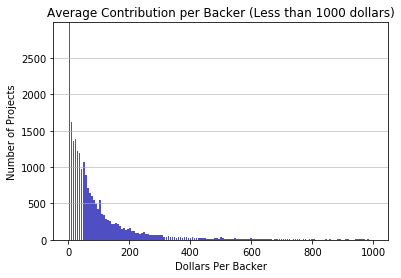

In [208]:
# visualize some of the vars

lessthan1k = cleaned_data[(cleaned_data['dollars_per_backer'] < 1000)]

n, bins, patches = plt.hist(x=lessthan1k['dollars_per_backer'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Number of Projects')
plt.xlabel('Dollars Per Backer')
plt.title('Average Contribution per Backer (Less than 1000 dollars)')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=maxfreq)

(0.0, 3034.0)

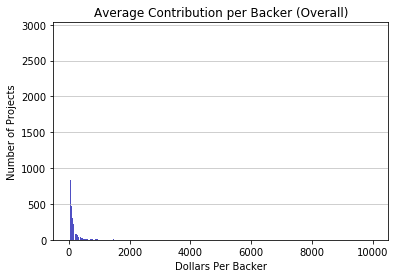

In [209]:
n, bins, patches = plt.hist(x=cleaned_data['dollars_per_backer'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Number of Projects')
plt.xlabel('Dollars Per Backer')
plt.title('Average Contribution per Backer (Overall)')
plt.ylim(ymax=n.max())

In [210]:
shortcampaigns = cleaned_data[(cleaned_data['campaign_length'] < 10)]
morethan1k = cleaned_data[(cleaned_data['dollars_per_backer'] > 1000)]
smallGoals = cleaned_data[(cleaned_data['usd_goal_real'] < 100)]
largeGoals = cleaned_data[(cleaned_data['usd_goal_real'] > 100000)]
bigdreamslittleprospects = largeGoals[(largeGoals.backers < 10)]

print("num campaigns less than 10 days: {}".format(len(shortcampaigns)))
print("num campaigns with an average donation of more than 1000 dollars: {}".format(len(morethan1k)))
print("num campaigns with goals of more than 100k: {}".format(len(largeGoals)))
print("num campaigns with goals of less than 50: {}".format(len(smallGoals)))
print("num campaigns with goals of more than 100k but less than 10 backers: {}".format(len(bigdreamslittleprospects)))
print("num campaigns with goals of more than 200k: {}".format(len(cleaned_data[(cleaned_data['usd_goal_real'] > 200000)])))
print("num campaigns with goals of more than 1MM: {}".format(len(cleaned_data[(cleaned_data['usd_goal_real'] > 1000000)])))

num campaigns less than 10 days: 127
num campaigns with an average donation of more than 1000 dollars: 246
num campaigns with goals of more than 100k: 2089
num campaigns with goals of less than 50: 110
num campaigns with goals of more than 100k but less than 10 backers: 1176
num campaigns with goals of more than 200k: 966
num campaigns with goals of more than 1MM: 124


num campaigns with 100k+goals 21158


Text(0.5,1,'Goal in Dollars')

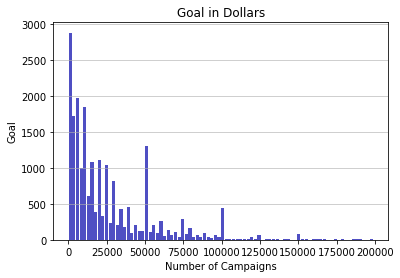

In [211]:
# Remove some of the outlandish data
cleaned_data = cleaned_data[(cleaned_data['usd_goal_real'] < 200000)]

cleaned_data = cleaned_data[(cleaned_data['usd_goal_real'] < 100000) | (cleaned_data['backers'] > 10)]


print("num campaigns with 100k+goals {}".format(len(cleaned_data)))

n, bins, patches = plt.hist(x=cleaned_data['usd_goal_real'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Campaigns')
plt.ylabel('Goal')
plt.title('Goal in Dollars')

In [212]:
cleaned_data.describe()

,backers,usd_pledged_real,usd_goal_real,campaign_length,dollars_per_backer
count,21158.000000,2.115800e+04,21158.000000,21158.000000,21158.000000
mean,218.457794,2.730662e+04,26353.372068,35.014983,109.956006
std,1136.753065,1.321855e+05,30054.727844,11.359346,209.611630
min,1.000000,4.900000e-01,0.750000,1.000000,0.490000
25%,3.000000,8.396250e+01,5000.000000,30.000000,20.548905
50%,15.000000,1.006555e+03,15000.000000,30.000000,52.473046
75%,87.000000,9.730448e+03,37824.240000,40.000000,116.676603
max,70122.000000,5.333793e+06,199004.980000,92.000000,5000.500000


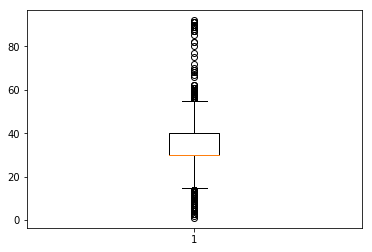

In [213]:
bp = plt.boxplot(x=cleaned_data['campaign_length'])

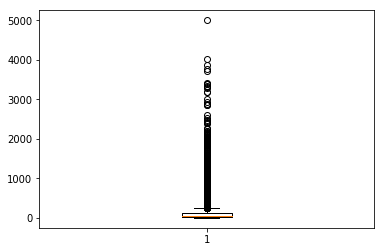

In [214]:
bp2 = plt.boxplot(x=cleaned_data['dollars_per_backer'])
cleaned_data = cleaned_data.drop(['backers', 'usd_pledged_real'], axis=1)

,usd_goal_real,campaign_length,dollars_per_backer
count,21158.000000,21158.000000,21158.000000
mean,9.402875,3.536112,3.840474
std,1.505824,0.314837,1.413164
min,0.559616,0.693147,0.398776
25%,8.517393,3.433987,3.070325
50%,9.615872,3.433987,3.979178
75%,10.540732,3.713572,4.767940
max,12.201090,4.532599,8.517493


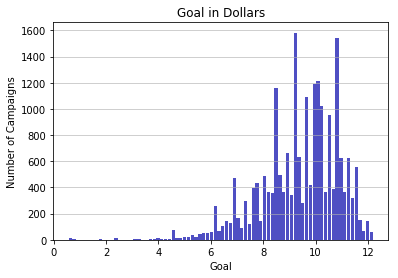

In [215]:
# Log transform some of these bad boys

yoodli = cleaned_data.copy(deep=True)
skewed = ['dollars_per_backer','usd_goal_real','campaign_length']
transformed_data = pd.DataFrame(data = yoodli)
transformed_data[skewed] = yoodli[skewed].apply(lambda x: np.log(x + 1))

n, bins, patches = plt.hist(x=transformed_data['usd_goal_real'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Goal')
plt.ylabel('Number of Campaigns')
plt.title('Goal in Dollars')
transformed_data.head()
transformed_data.describe()

In [216]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

scaledAndTransformedData = pd.DataFrame(data = transformed_data)
scaledAndTransformedData[skewed] = scaler.fit_transform(transformed_data[skewed])

In [217]:
# format dependent variable

def determineState(state):
    if state == 'successful':
        return 1
    else: 
        return 0

scaledAndTransformedData['outcome'] = [determineState(row) for row in scaledAndTransformedData['state']]
outcome = scaledAndTransformedData['outcome']
scaledAndTransformedData = scaledAndTransformedData.drop(['state', 'outcome'], axis=1)

In [218]:
# One hot encode variables
finalData = pd.get_dummies(scaledAndTransformedData)
finalData.head()
print(list(finalData.columns))

['usd_goal_real', 'campaign_length', 'dollars_per_backer', 'category_3D Printing', 'category_Apps', 'category_Camera Equipment', 'category_DIY Electronics', 'category_Fabrication Tools', 'category_Flight', 'category_Gadgets', 'category_Hardware', 'category_Makerspaces', 'category_Robots', 'category_Software', 'category_Sound', 'category_Space Exploration', 'category_Technology', 'category_Wearables', 'category_Web', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US']


In [219]:
# Actual testing
# shuffling and splitting the data

# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(finalData, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("Outcomes training set has {} samples.".format(y_train.shape[0]))
print("Outcomes testing set has {} samples.".format(y_test.shape[0]))

Training set has 16926 samples.
Testing set has 4232 samples.
Outcomes training set has 16926 samples.
Outcomes testing set has 4232 samples.


In [220]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])        
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5, labels=None)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, labels=None)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print('training accuracy is {} and testing accuracy is {}'.format(results['acc_train'], results['acc_test']))
    print('training F score is {} and testing F score is {}'.format(results['f_train'], results['f_test']))
        
    # Return the results
    return results

In [221]:
# naive predictions
import collections
counts = collections.Counter(outcome)
print(counts)

# TP = np.sum(income)
TP = counts[1]
print('TP is', TP)

FP = outcome.count() - TP
print('FP is', FP)

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5

def harmonicMeanCalculator(beta, precision, recall):
    harmonicMean = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    return harmonicMean

fscore = harmonicMeanCalculator(beta, precision, recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Counter({0: 14796, 1: 6362})
TP is 6362
FP is 14796
Naive Predictor: [Accuracy score: 0.3007, F-score: 0.3496]


In [222]:
import visuals as vs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from math import floor

clf_A = LogisticRegression(random_state=42)
# Bagged and boosted decision trees
# including bagged trees bc random forests only include some vars when estimating
clf_B = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=2), n_estimators = 20)
clf_C = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=2), n_estimators = 20)
# Boosted random forest
clf_D = AdaBoostClassifier(base_estimator = RandomForestClassifier(random_state=2), n_estimators = 20)


samples_100 = len(y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)
print(results)

LogisticRegression trained on 169 samples.
training accuracy is 0.77 and testing accuracy is 0.7206994328922496
training F score is 0.6769230769230768 and testing F score is 0.4569620253164557
LogisticRegression trained on 1692 samples.
training accuracy is 0.8 and testing accuracy is 0.7653591682419659
training F score is 0.7126948775055679 and testing F score is 0.5876026593664451
LogisticRegression trained on 16926 samples.
training accuracy is 0.7733333333333333 and testing accuracy is 0.7719754253308129
training F score is 0.6673960612691466 and testing F score is 0.600990099009901
AdaBoostClassifier trained on 169 samples.
training accuracy is 0.8633333333333333 and testing accuracy is 0.6947069943289225
training F score is 0.7904761904761906 and testing F score is 0.4962983273923773
AdaBoostClassifier trained on 1692 samples.
training accuracy is 1.0 and testing accuracy is 0.7126654064272212
training F score is 1.0 and testing F score is 0.5105472332619995
AdaBoostClassifier tr

In [223]:
# Bagging and boosting DT models
def generateDTModels():
    dt_clf = DecisionTreeClassifier(random_state=2)

    parameters = {
        'min_samples_leaf' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'min_samples_split' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    }
    scorer = make_scorer(fbeta_score, beta = 0.5)

    grid_obj = GridSearchCV(dt_clf, parameters, scoring = scorer)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_clf = grid_fit.best_estimator_

    predictions = (dt_clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    print('best dt clf is', best_clf)
    
    clf_arr = [AdaBoostClassifier(base_estimator = best_clf), BaggingClassifier(base_estimator = best_clf)]
    clf_arr_names = ['ada boost', 'bagging']
    params_arr = [
        {
        'learning_rate' : [0.05, 0.1, 0.15, 0.2,  0.5, 0.75, 1],
        }, 
        {
        'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        }   
    ]
    
    dt_ensemble_clf_arr = []
    
    for i, clf in enumerate(clf_arr):
        scorer = make_scorer(fbeta_score, beta = 0.5)

        grid_obj = GridSearchCV(clf, params_arr[i], scoring = scorer)

        grid_fit = grid_obj.fit(X_train, y_train)

        best_clf = grid_fit.best_estimator_
        dt_ensemble_clf_arr.append(best_clf)

        predictions = (clf.fit(X_train, y_train)).predict(X_test)
        best_predictions = best_clf.predict(X_test)
        
        feature_importances = np.mean([
            tree.feature_importances_ for tree in best_clf.estimators_
        ], axis=0)

        # Report the before-and-afterscores
        print('best boosted or bagged dt clf is', best_clf)
        print('results for the {} model'.format(clf_arr_names[i]))
        print("Unoptimized model\n------")
        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
        print("\nOptimized Model\n------")
        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        print('feature importance for the {} model is {}'.format(clf_arr_names[i], feature_importances))
    return dt_ensemble_clf_arr

In [224]:
dt_ensemble_clf_arr = generateDTModels()

Unoptimized model
------
Accuracy score on testing data: 0.7254
F-score on testing data: 0.5264

Optimized Model
------
Final accuracy score on the testing data: 0.7644
Final F-score on the testing data: 0.5873
best dt clf is DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0005, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
best boosted or bagged dt clf is AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0005, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_stat

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

best boosted or bagged dt clf is BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0005, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.9,
         max_samples=0.6, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
results for the bagging model
Unoptimized model
------
Accuracy score on testing data: 0.7689
F-score on testing data: 0.5954

Optimized Model
------
Final accuracy score on the testing data: 0.7698
Final F-score on the testing data: 0.5926
feature importance for the bagging model is [0.06388082 0.00393604 0.00328958 0.00089004 0.00553221 0.01051247
 0.00256572 0.00358136 0.06816

In [225]:
# Boosted and unboosted RF models
def generateRFModels(rf_clf):

    parameters = {
        'min_samples_leaf' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
        'min_samples_split' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
    }
    scorer = make_scorer(fbeta_score, beta = 0.5)

    grid_obj = GridSearchCV(rf_clf, parameters, scoring = scorer)

    grid_fit = grid_obj.fit(X_train, y_train)

    best_rf_clf = grid_fit.best_estimator_

    predictions = (rf_clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_rf_clf.predict(X_test)

    # Report the before-and-afterscores
    print("Unoptimized model\n------")
    print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
    print("\nOptimized Model\n------")
    print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    print('best rf clf is', best_rf_clf)
    
    clf_arr = [AdaBoostClassifier(base_estimator = best_rf_clf)]
    clf_arr_names = ['ada boost']
    params_arr = [
        {
        'learning_rate' : [0.05, 0.1, 0.15, 0.2,  0.5, 0.75, 1],
        }, 
        {
        'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'max_features' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        }   
    ]
    
    for i, clf in enumerate(clf_arr):
        scorer = make_scorer(fbeta_score, beta = 0.5)

        grid_obj = GridSearchCV(clf, params_arr[i], scoring = scorer)

        grid_fit = grid_obj.fit(X_train, y_train)

        best_boosted_rf_clf = grid_fit.best_estimator_

        predictions = (clf.fit(X_train, y_train)).predict(X_test)
        best_predictions = best_boosted_rf_clf.predict(X_test)
        
        feature_importances = np.mean([
            tree.feature_importances_ for tree in best_boosted_rf_clf.estimators_
        ], axis=0)

        # Report the before-and-afterscores
        print('best boosted or bagged rf clf is', best_boosted_rf_clf)
        print('results for the {} model'.format(clf_arr_names[i]))
        print("Unoptimized model\n------")
        print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
        print("\nOptimized Model\n------")
        print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        print('feature importance for the {} model is {}'.format(clf_arr_names[i], feature_importances))
    return best_rf_clf, best_boosted_rf_clf

In [226]:
rf_clf = RandomForestClassifier(random_state=2)
best_rf_clf, best_boosted_rf_clf = generateRFModels(rf_clf)

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/pyt

/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Syed.Farooq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Unoptimized model
------
Accuracy score on testing data: 0.7495
F-score on testing data: 0.5566

Optimized Model
------
Final accuracy score on the testing data: 0.7755
Final F-score on the testing data: 0.6084
best rf clf is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0001, min_samples_split=0.005,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)
best boosted or bagged rf clf is AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.0001, min_samples_sp

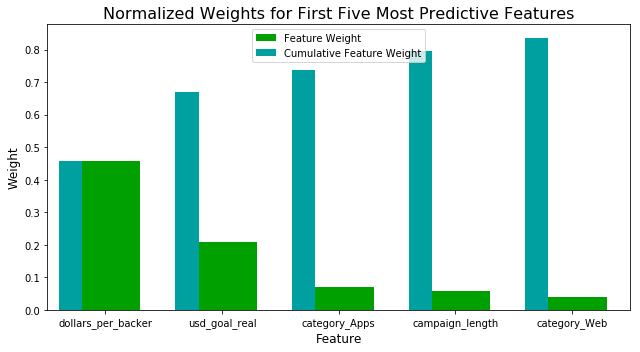

In [227]:
importances = best_rf_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [228]:
clf = LogisticRegression(random_state=42)
parameters = {'penalty': ['l1', 'l2'], 'C': [ 7,8,9,10,11,12,13,14, 20, 50]}
# parameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50]}

scorer = make_scorer(fbeta_score, beta = 0.5)

grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_log_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_log_clf.predict(X_test)

print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print('best log clf is', best_log_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7720
F-score on testing data: 0.6010

Optimized Model
------
Final accuracy score on the testing data: 0.7732
Final F-score on the testing data: 0.6039
best log clf is LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


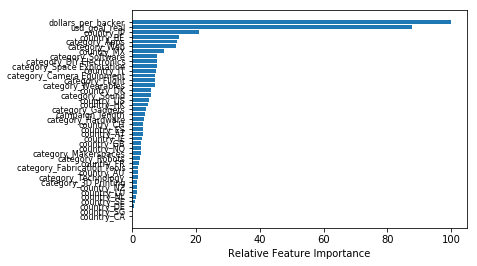

In [229]:
# plotting feature importance based on logistic regression
feature_importance = abs(best_log_clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.show()

In [230]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

pp.pprint(list(zip(best_log_clf.coef_[0], X_test.columns)))

[   (-7.93909622267275, 'usd_goal_real'),
    (-0.3718159136654386, 'campaign_length'),
    (9.058691012057993, 'dollars_per_backer'),
    (0.14809338992840548, 'category_3D Printing'),
    (-1.2763452911058064, 'category_Apps'),
    (0.6429347154119501, 'category_Camera Equipment'),
    (0.6985248004025496, 'category_DIY Electronics'),
    (-0.16773674545502099, 'category_Fabrication Tools'),
    (-0.6398869948870058, 'category_Flight'),
    (0.3947064244230505, 'category_Gadgets'),
    (0.3213548393081094, 'category_Hardware'),
    (0.2364266026805957, 'category_Makerspaces'),
    (0.2238357933767305, 'category_Robots'),
    (-0.7092987283930084, 'category_Software'),
    (0.521498670528404, 'category_Sound'),
    (0.6957182716039141, 'category_Space Exploration'),
    (-0.1635515048806428, 'category_Technology'),
    (0.639296728410629, 'category_Wearables'),
    (-1.237810872420953, 'category_Web'),
    (-0.2943002118649086, 'country_AT'),
    (0.16697232110912397, 'country_AU'),
 

In [231]:
clf_A = best_log_clf
# Bagged and boosted decision trees
clf_B = dt_ensemble_clf_arr[0]
clf_C = dt_ensemble_clf_arr[1]
# Boosted random forest
clf_D = best_rf_clf

samples_100 = len(y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
print(results)

LogisticRegression trained on 16926 samples.
training accuracy is 0.7766666666666666 and testing accuracy is 0.7731568998109641
training F score is 0.6724511930585685 and testing F score is 0.6038506417736289
AdaBoostClassifier trained on 16926 samples.
training accuracy is 0.9333333333333333 and testing accuracy is 0.7726843100189036
training F score is 0.8884688090737239 and testing F score is 0.6053540587219344
BaggingClassifier trained on 16926 samples.
training accuracy is 0.7766666666666666 and testing accuracy is 0.7707939508506616
training F score is 0.6769596199524941 and testing F score is 0.5978481526593585
RandomForestClassifier trained on 16926 samples.
training accuracy is 0.81 and testing accuracy is 0.7755198487712666
training F score is 0.7249466950959488 and testing F score is 0.6083763398173879
{'LogisticRegression': {0: {'acc_train': 0.7766666666666666, 'acc_test': 0.7731568998109641, 'f_train': 0.6724511930585685, 'f_test': 0.6038506417736289}}, 'AdaBoostClassifier